# Crop Production Data Analysis

In [1]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Creating a dataframe to read the raw data file.
df=pd.read_csv("C:/Users/HP/Desktop/Crop Production data (1).csv")

In [35]:
#To find number of rows and columns 
df.shape

(246091, 7)

# Data Cleaning

In [3]:
# Check for missing values
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [4]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print("\nDuplicate rows:")
print(duplicate_rows)


Duplicate rows:
Empty DataFrame
Columns: [State_Name, District_Name, Crop_Year, Season, Crop, Area, Production]
Index: []


In [5]:
# Drop missing values from the 'Production' column
df_clean = df.dropna(subset=['Production'])

In [6]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [7]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
# Convert blank cells to NaN
df['Production'] = df['Production'].replace('', pd.NA)

In [9]:
# Drop missing values from the 'Production' column
df_clean = df.dropna(subset=['Production'])

In [10]:
df_clean

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [11]:
df_clean.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [36]:
#After data cleaning number of columns and rows
df_clean.shape

(242361, 7)

In [12]:
#Names of all columns in the dataframe
print(df_clean.columns)

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')


In [13]:
# Explore the dataset to understand its structure and contents
print(df_clean.head())

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [14]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB
None


In [15]:
#All unique state names
unique_state_name=df_clean["State_Name"].unique()
print(unique_state_name)

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [17]:
#Statewise Production with most orders
state=df_clean["State_Name"].value_counts().reset_index()
state.head(5)

,index,State_Name
0,Uttar Pradesh,33189
1,Madhya Pradesh,22604
2,Karnataka,21079
3,Bihar,18874
4,Assam,14622


In [18]:
#Districtwise Production with most orders \\\]
district=df_clean["District_Name"].value_counts().reset_index()
district.head(6)

,index,District_Name
0,TUMKUR,931
1,BELGAUM,924
2,BIJAPUR,905
3,HASSAN,895
4,BELLARY,887
5,DAVANGERE,881


In [19]:
#Cropyearwise Production with most orders 
crop_year=df_clean["Crop_Year"].value_counts().reset_index()
crop_year.head(6)

,index,Crop_Year
0,2003,17139
1,2002,16536
2,2007,14269
3,2008,14230
4,2006,13976
5,2004,13858


In [20]:
#Cropareawise Production with most orders 
crop_area=df_clean["Area"].value_counts().reset_index()
crop_area.head(6)

,index,Area
0,1.0,3573
1,2.0,3140
2,100.0,2621
3,3.0,2478
4,4.0,2182
5,5.0,2090


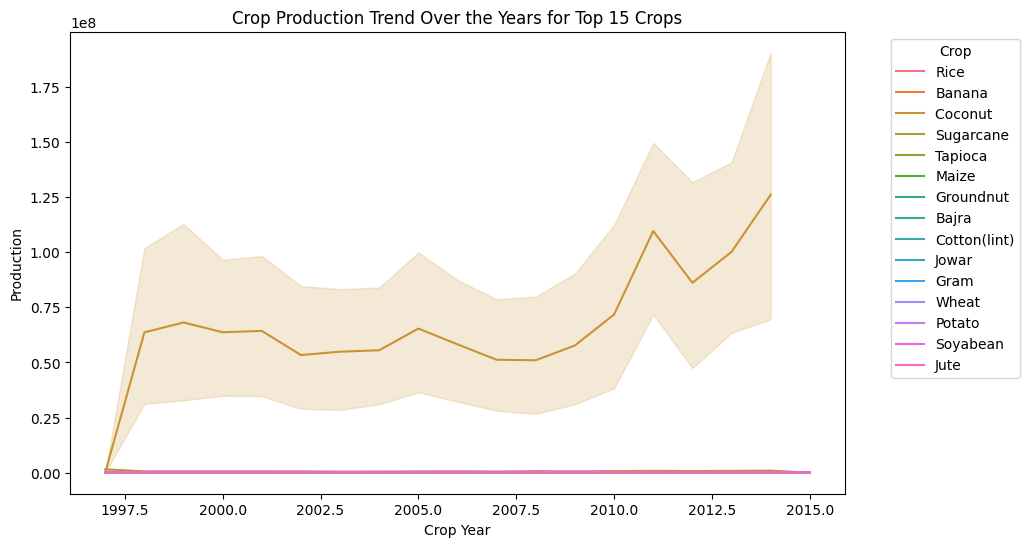

In [21]:
# Group by crop and sum production to find the top 15 crops
top_crops = df_clean.groupby('Crop')['Production'].sum().nlargest(15).index.tolist()

# Filter the dataframe to include only the top 15 crops
df_top_crops = df_clean[df_clean['Crop'].isin(top_crops)]

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_top_crops, x='Crop_Year', y='Production', hue='Crop')
plt.title('Crop Production Trend Over the Years for Top 15 Crops')
plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Increasing crop production offers economic growth and food security prospects but demands sustainable management to tackle environmental degradation, resource depletion, and socio-economic disparities for enduring agricultural prosperity.

C:\Users\HP\AppData\Local\Temp\ipykernel_14512\3004513088.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


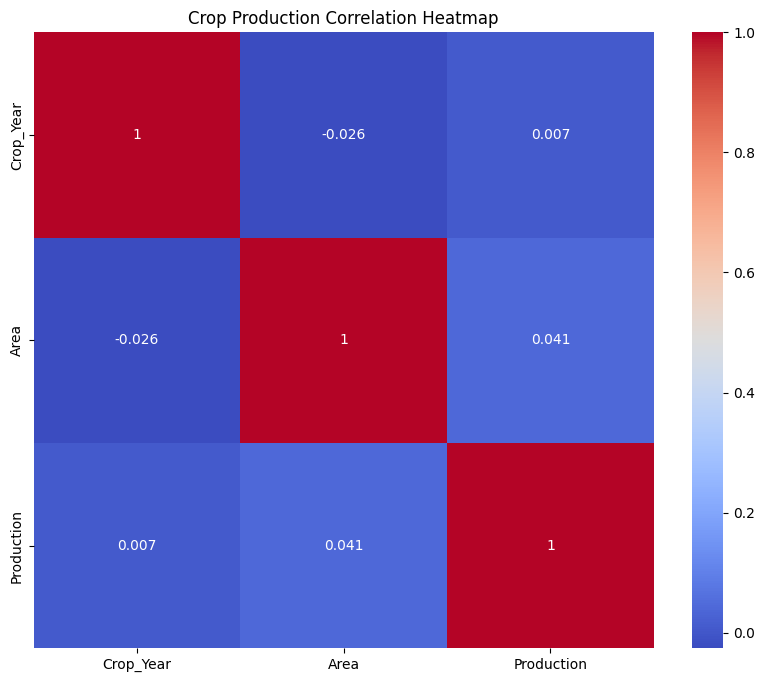

In [22]:
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Crop Production Correlation Heatmap')
plt.show()

Crop year and production are positively correlated.Area and production are positively correlated.Area and production are negatively correlated.So,The trends reveal a positive trajectory in crop production over time, influenced by either expanded cultivation or enhanced agricultural methods, emphasizing the need for sustainable practices to address evolving challenges and ensure long-term agricultural prosperity.

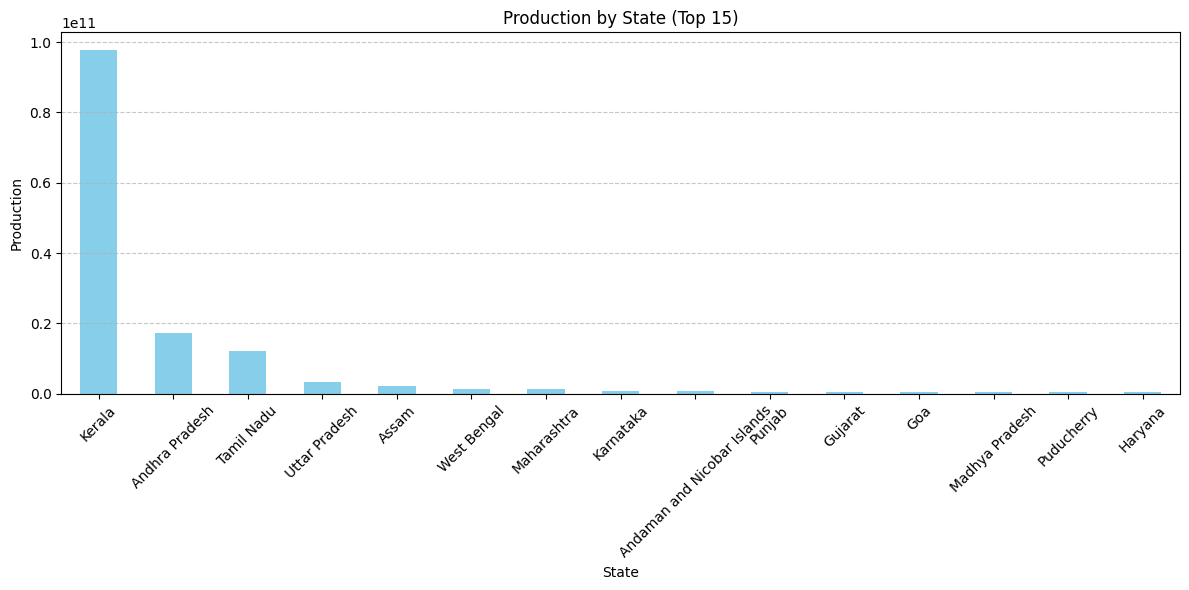

In [23]:
# Calculate total production by state
state_production = df_clean.groupby('State_Name')['Production'].sum().sort_values(ascending=False)

# Select top 15 states
top_15_states = state_production.head(15)

# Plotting
plt.figure(figsize=(12, 6))
top_15_states.plot(kind='bar', color='skyblue')
plt.title('Production by State (Top 15)')
plt.xlabel('State')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Production is higher in Kerala state.This implies that Kerala state exhibits higher levels of crop production compared to other states.

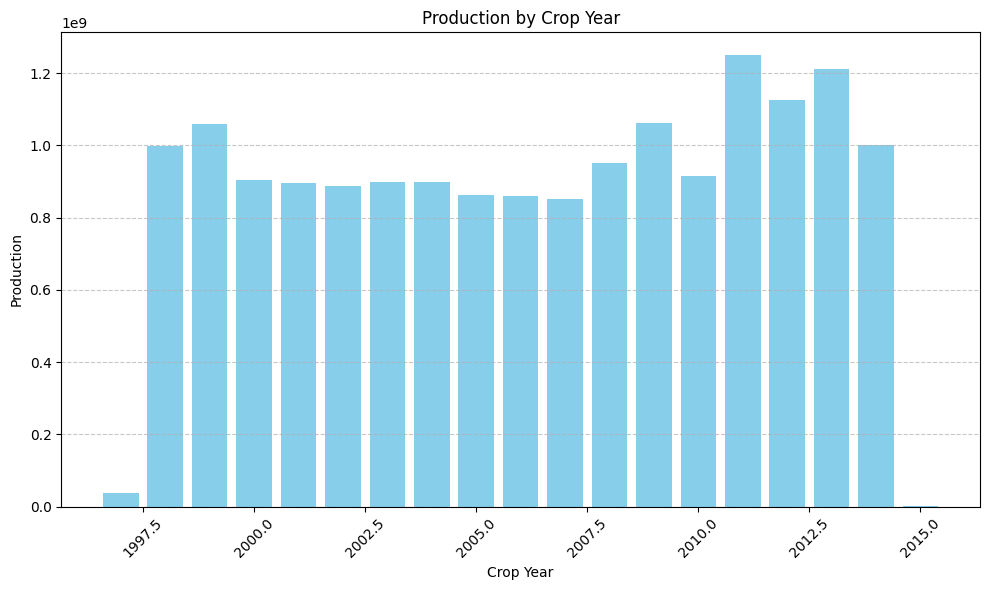

In [24]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_clean['Crop_Year'], df_clean['Production'], color='skyblue')
plt.title('Production by Crop Year')
plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Production is higher in 2011.crop production reached its zenith in 2011, reflecting potential favorable conditions or advancements conducive to higher yields during that year.

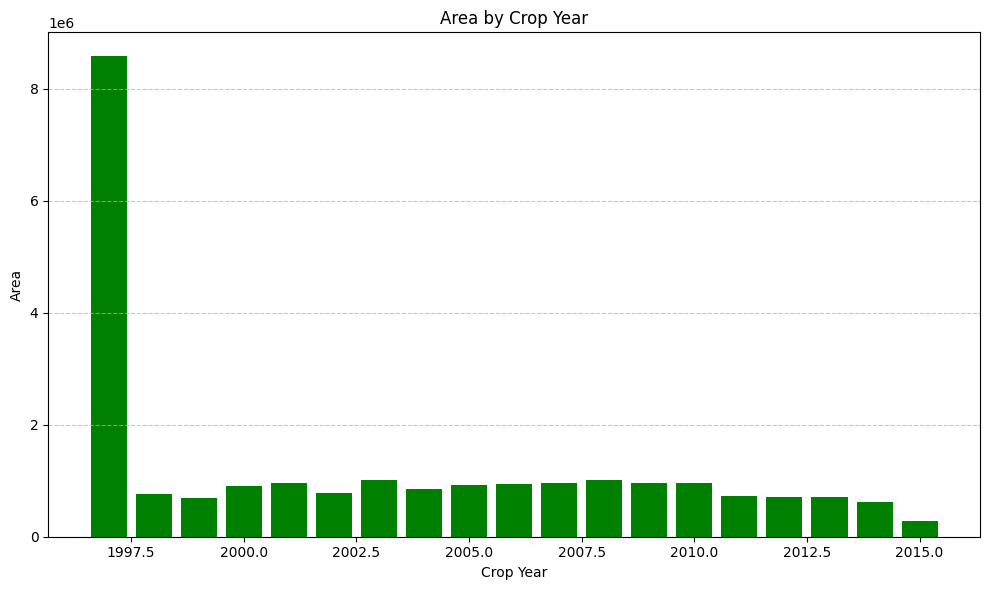

In [26]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_clean['Crop_Year'], df_clean['Area'], color='green')
plt.title('Area by Crop Year')
plt.xlabel('Crop Year')
plt.ylabel('Area')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines
plt.tight_layout()
plt.show()

A significant amount of land was cultivated for crops during that 1997 year compared to other years

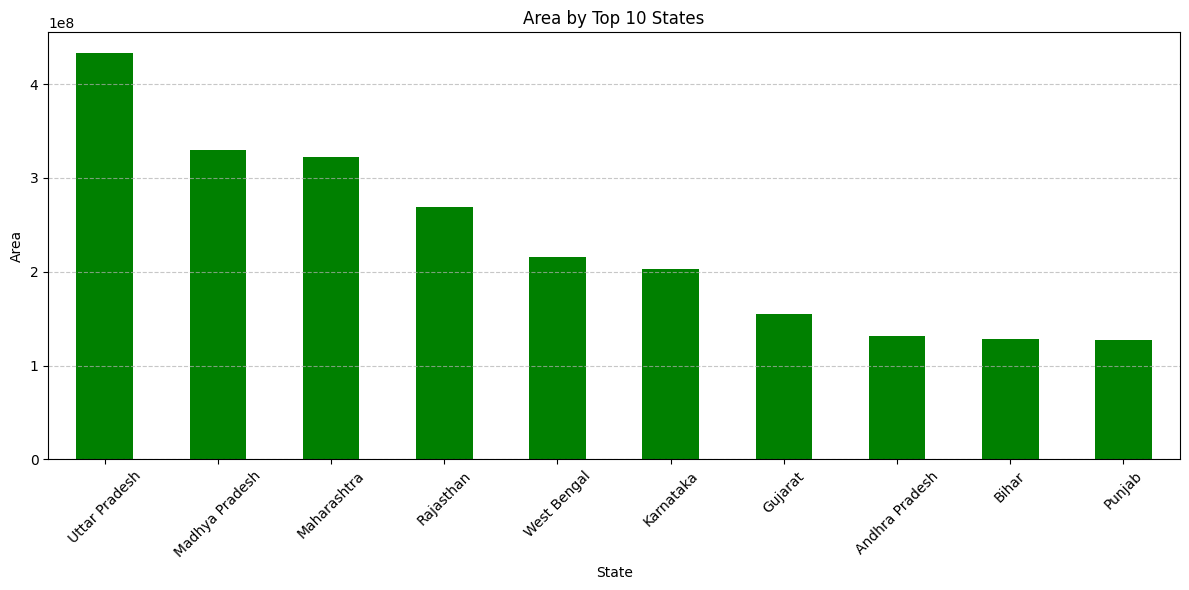

In [27]:
# Calculate total area by state
state_area = df_clean.groupby('State_Name')['Area'].sum().sort_values(ascending=False)

# Select top 10 states
top_10_states = state_area.head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_10_states.plot(kind='bar', color='green')
plt.title('Area by Top 10 States')
plt.xlabel('State')
plt.ylabel('Area')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Largest area is in Uttar pradesh state.The statement highlights Uttar Pradesh's dominance in agricultural land, suggesting extensive crop cultivation within the state.

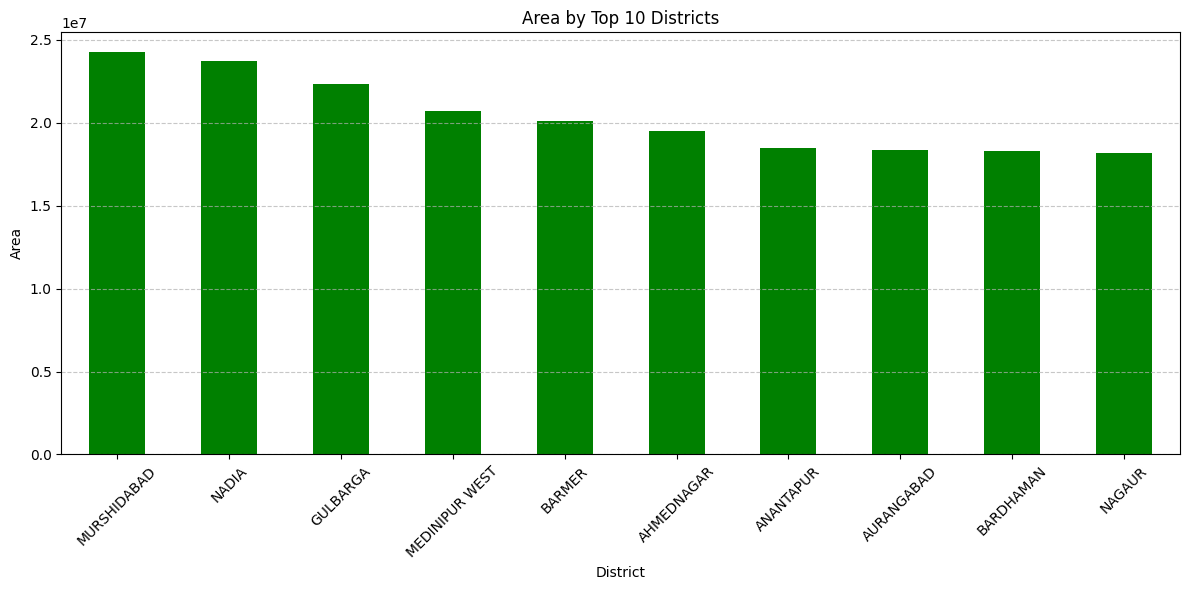

In [28]:
# Calculate total area by district
district_area = df_clean.groupby('District_Name')['Area'].sum().sort_values(ascending=False)

# Select top 10 districts
top_10_districts = district_area.head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_10_districts.plot(kind='bar', color='green')
plt.title('Area by Top 10 Districts')
plt.xlabel('District')
plt.ylabel('Area')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Largest crop production area is in Murshibad district.Murshidabad district's preeminence in crop production area, reflecting its agricultural prowess and potential for localized agricultural development strategies. 

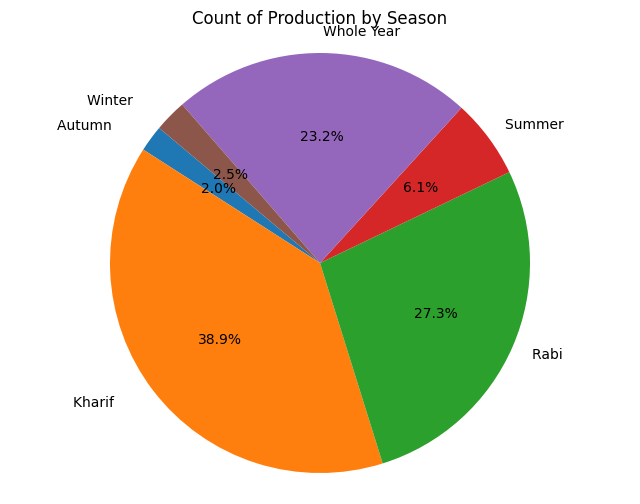

In [29]:
# Calculate count of production by season
production_by_season = df_clean.groupby('Season')['Production'].count()

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(production_by_season, labels=production_by_season.index, autopct='%1.1f%%', startangle=140)
plt.title('Count of Production by Season')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Crop production is higher in kharip season.crop production peaks during the Kharif season, likely due to favorable environmental conditions, guiding seasonal agricultural planning and resource allocation strategies for optimal yield during this period.